# Multiple Linear Regression

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from numpy.linalg import inv

import  statsmodels.formula.api as smf

In [3]:
data = pd.read_csv("Student_Performance.csv")
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [4]:
data['Extracurricular Activities'] = data['Extracurricular Activities'].apply(lambda x: 1 if x=="Yes" else 0)
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [5]:
data.describe()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,0.494800,6.530600,4.583300,55.224800
std,2.589309,17.343152,0.499998,1.695863,2.867348,19.212558
min,1.000000,40.000000,0.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,0.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,0.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,1.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,1.000000,9.000000,9.000000,100.000000


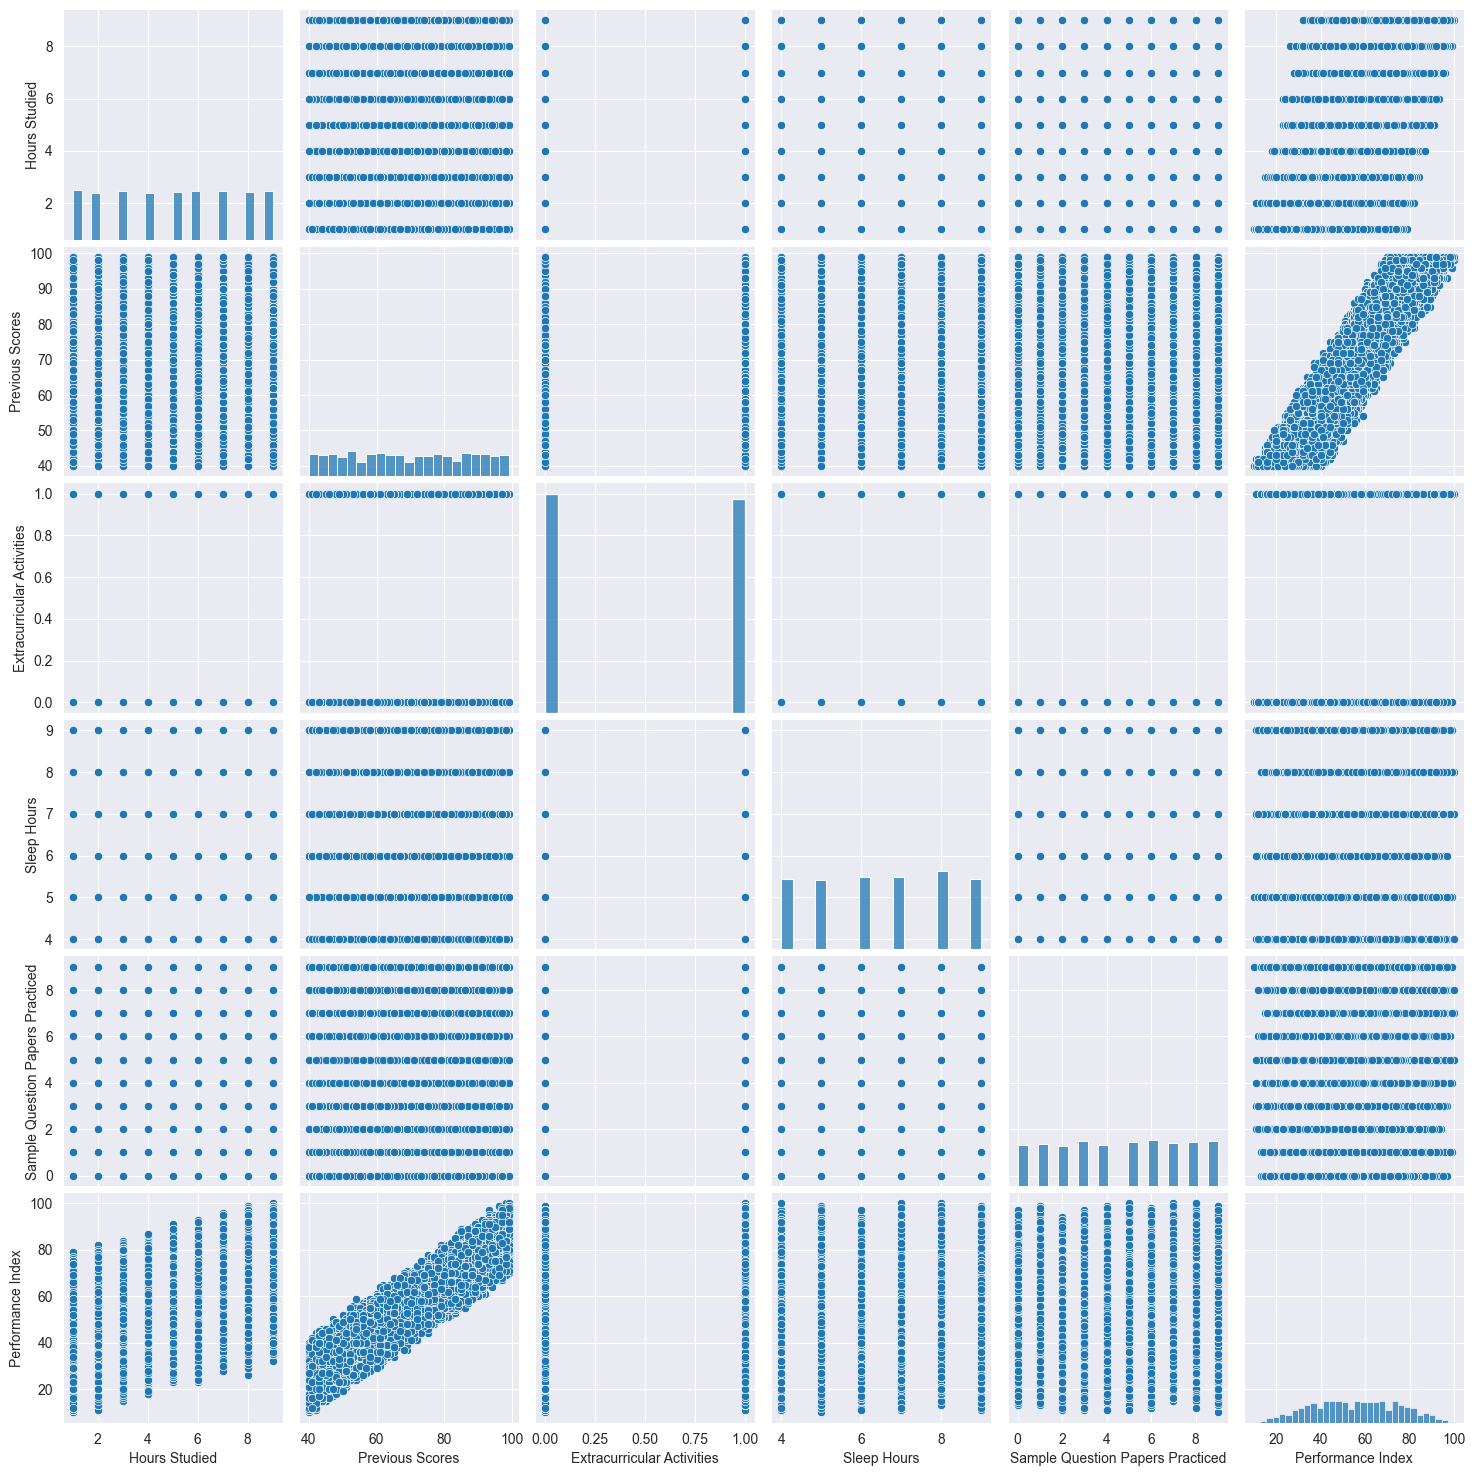

In [6]:
sns.pairplot(data)

<Axes: >

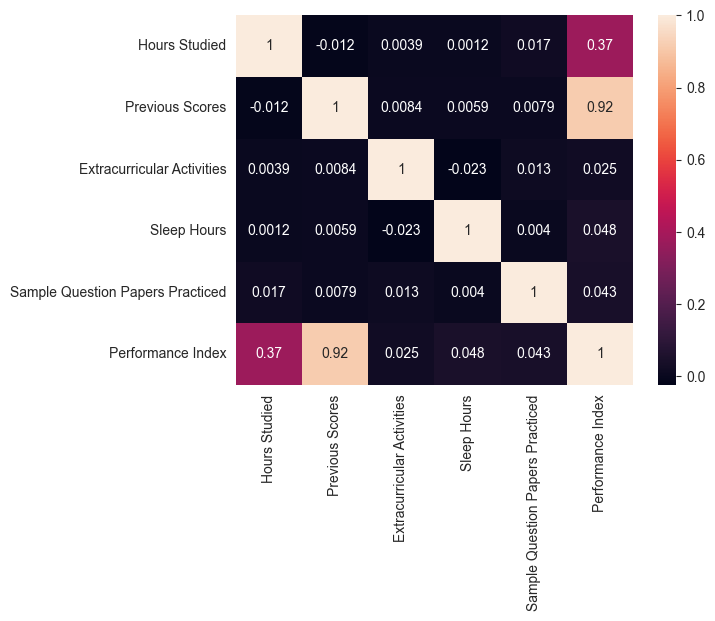

In [8]:
sns.heatmap(data.corr(), annot=True)

## Multiple Linear Regression from scratch

In [43]:
X = data.drop(["Performance Index"], axis=1)
y = data['Performance Index']


class MultipleLinearRegression:
    def __init__(self, X, y):
        self.X = np.array(X)
        self.y = np.array(y)
        self._prepare_data()
        
    def _prepare_data(self):
        self.X = np.concatenate((np.ones(shape=(X.shape[0], 1)), X), axis=1)
        
    
    def get_optimal_cof(self):
        self.betas = np.dot(inv(np.dot(X.T, X)), np.dot(X.T, y))
        return self.betas
    
MLP = MultipleLinearRegression(X, y)
MLP.get_optimal_cof()

array([ 2.1959844 ,  0.8172197 , -1.17087492, -1.50360149, -0.2656486 ])

In [10]:
X = data.drop(["Performance Index"], axis=1)
y = data['Performance Index']


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,1,9,1
1,4,82,0,4,2
2,8,51,1,7,2
3,5,52,1,5,2
4,7,75,0,8,5
...,...,...,...,...,...
9995,1,49,1,4,2
9996,7,64,1,8,5
9997,6,83,1,8,5
9998,9,97,1,7,0


## Multiple Linear Regression using statsmodels

In [48]:
data

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,1,4,2,23.0
9996,7,64,1,8,5,58.0
9997,6,83,1,8,5,74.0
9998,9,97,1,7,0,95.0


In [54]:
data.columns = ['Hours_Studied', 'Previous_Scores', 'Extracurricular_Activities', 'Sleep_Hours', 'Sample_Question_Papers_Practiced', 'Performance_Index']

model = smf.ols(formula='Performance_Index ~ Hours_Studied + Previous_Scores + Extracurricular_Activities + Sleep_Hours + Sample_Question_Papers_Practiced ', data=data).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Performance_Index   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 1.757e+05
Date:                Sat, 20 Jul 2024   Prob (F-statistic):               0.00
Time:                        00:33:09   Log-Likelihood:                -21307.
No. Observations:               10000   AIC:                         4.263e+04
Df Residuals:                    9994   BIC:                         4.267e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [56]:
hypotheses = '(Hours_Studied = 0)'
f_test = model.f_test(hypotheses)
print(f_test)

<F test: F=131300.00311466274, p=0.0, df_denom=9.99e+03, df_num=1>


The result of the F-test strongly suggests that the predictor variable "Hours_Studied" is statistically significant in the model. The high F-statistic and the extremely low p-value provide strong evidence against the null hypothesis that the coefficient of "Hours_Studied" is zero. Therefore, we can conclude that "Hours_Studied" has a significant effect on the dependent variable.

In [57]:
hypotheses = '(Hours_Studied = 0), (Previous_Scores = 0)'
f_test = model.f_test(hypotheses)
print(f_test)

<F test: F=437140.80652755836, p=0.0, df_denom=9.99e+03, df_num=2>


In [58]:
hypotheses = '(Sample_Question_Papers_Practiced = 0)'
f_test = model.f_test(hypotheses)
print(f_test)

<F test: F=742.9208694067365, p=7.461573308244412e-158, df_denom=9.99e+03, df_num=1>
